In [1]:
%cd ..

F:\Courses\python\machine_learning\churn_prediction


In [2]:
import os 
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.tight_layout()
sns.set_style("darkgrid")

<Figure size 640x480 with 0 Axes>

In [6]:
data = pd.read_csv(r"input/train.csv")

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,6338.0,0.165194,0.371385,0.00,0.00,0.0,0.00,1.00
tenure,6338.0,32.517513,24.596105,0.00,9.00,29.0,56.00,72.00
MonthlyCharges,6338.0,64.695488,30.134083,18.25,35.45,70.3,89.85,118.75


In [8]:
data.describe(include=object).T

,count,unique,top,freq
customerID,6338,6338,7590-VHVEG,1
gender,6338,2,Male,3188
Partner,6338,2,No,3278
Dependents,6338,2,No,4464
PhoneService,6338,2,Yes,5708
MultipleLines,6338,3,No,3034
InternetService,6338,3,Fiber optic,2776
OnlineSecurity,6338,3,No,3156
OnlineBackup,6338,3,No,2752
DeviceProtection,6338,3,No,2773


 Dropping ininformative columns.

In [9]:
data.drop(axis=1,labels=["customerID"],inplace=True)

* Dealing with missing values.

## Cleaning

In [10]:
def clean_total_charges(x):
    if (x in [" ",' ']):
        return np.nan
    return x

In [11]:
data["TotalCharges"] = data["TotalCharges"].map(clean_total_charges).astype(float)

In [12]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
Churn               0
dtype: int64

The data have 7 missing values, we will drop the rows containing these values.

In [13]:
data.dropna(inplace=True)

* Dropping duplicated values.

In [14]:
data.drop_duplicates(inplace=True)

# Explaratory Data Analysis.

In [15]:
numerical_columns = list(data.select_dtypes(exclude=[object]).columns)
categorical_columns = list(data.select_dtypes(include=[object]).columns)
categorical_columns.remove("Churn") #excluding the target variable

## Univariate Analysis

### 1. Numerical features.

#### 1.1 Distributions.

In [12]:
def plot_numerical_features(numerical_columns,ncols,kind,subtitle):
    if type(len(numerical_columns)//ncols) is int:
        nrows = len(numerical_columns) // ncols
    else:    
        nrows = len(numerical_columns) // ncols + 1
    fig, axes = plt.subplots(nrows = nrows,ncols = ncols,figsize = (15.6,5))
    fig.suptitle(subtitle,y=1, size=25)
    axes = axes.flatten()
    for i, column in enumerate(numerical_columns):
        if(kind=="hist"):
            sns.histplot(data[column],ax=axes[i],color="#008080",kde=True)
        elif(kind=="box"):
            sns.boxplot(data[column],ax=axes[i],color="#008080",orient="h")
        axes[i].set_title(column)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


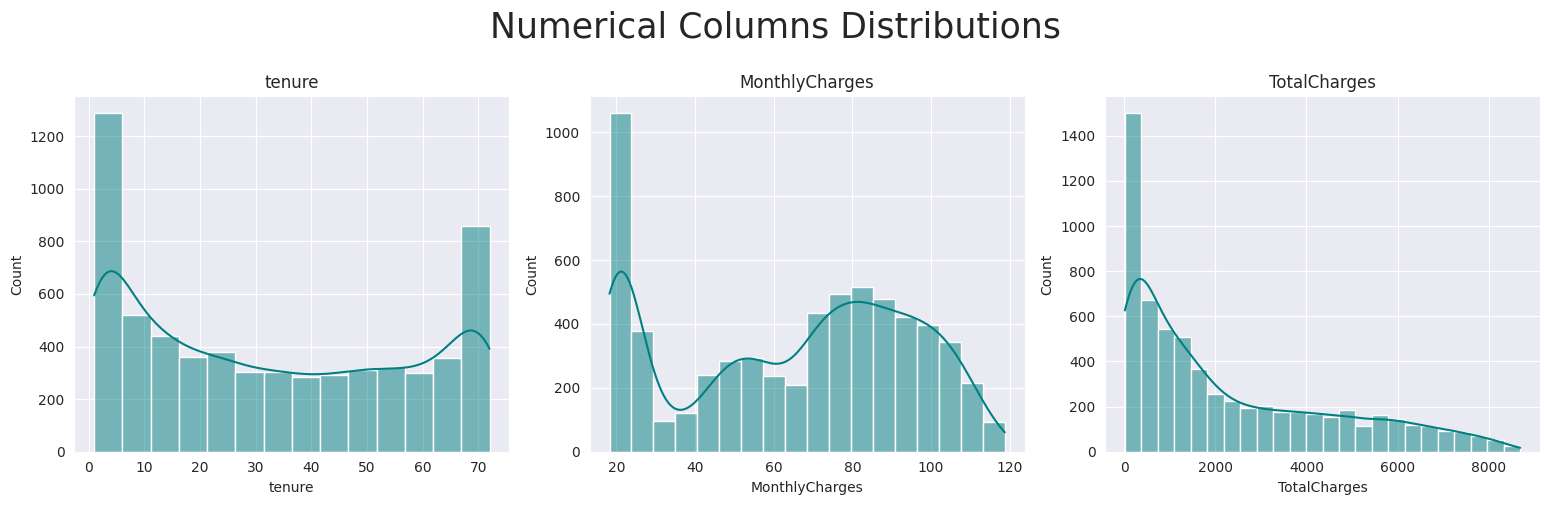

In [29]:
plot_numerical_features(numerical_columns,3,"hist","Numerical Columns Distributions")
plt.tight_layout()

#### 1.2 Box Plots.

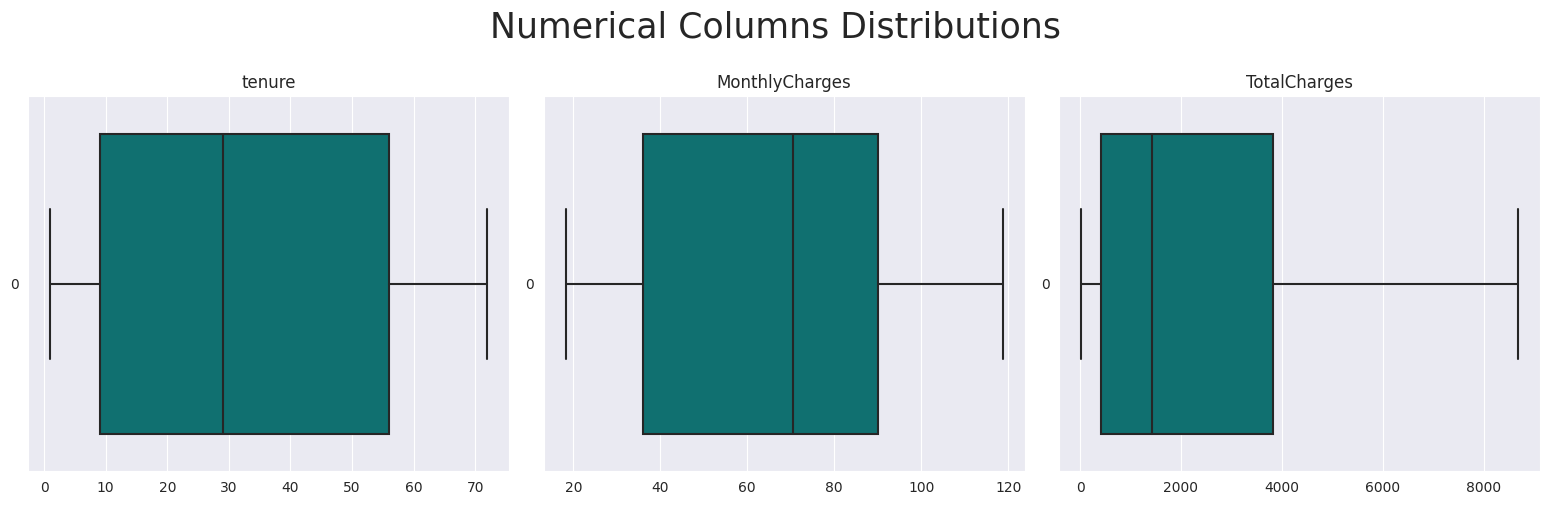

In [30]:
plot_numerical_features(numerical_columns,3,"box","Numerical Columns Distributions")
plt.tight_layout()

In [15]:
transformer = PowerTransformer()

In [21]:
x = transformer.fit_transform(data["MonthlyCharges"].values.reshape(-1,1))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

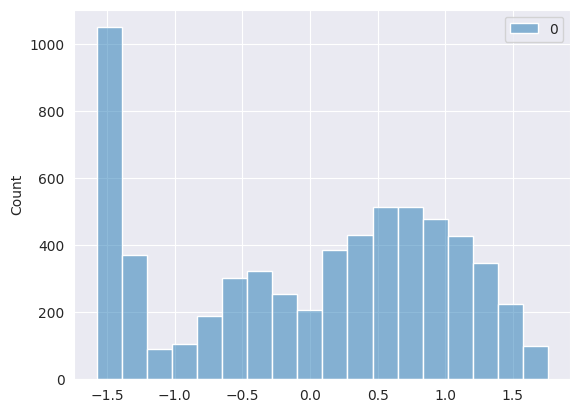

In [22]:
sns.histplot(x)

#### 1.3 Outliers.
Using the IQR method for outlier detection.

In [31]:
def detect_outliers(data,columns):
    outliers_map = {}
    for column in columns:
        outliers_map[column] = []
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers_indices = list(data[(data[column] > Q3 + outlier_step) | (data[column] < Q1 - outlier_step)].index)
        outliers_map[column].extend(outliers_indices)
        print(f"The numer of detected outliers in {column} = {len(outliers_indices)}")
    return outliers_map

In [32]:
detect_outliers(data,numerical_columns)

The numer of detected outliers in tenure = 0
The numer of detected outliers in MonthlyCharges = 0
The numer of detected outliers in TotalCharges = 0


{'tenure': [], 'MonthlyCharges': [], 'TotalCharges': []}

#### Observations:
1- None of the features is normally distributed.</br>
2- total_charges column is right skewed.</br>
3- The dataset has no outliers.

### 2. Categorical Features.

#### 2.1. Count plots.

In [41]:
def plot_categorical_features(columns,ncols,subtitle):
    if type(len(columns)/ncols) is int:
        nrows = len(columns) // ncols
    else:    
        nrows = len(columns) // ncols + 1
    fig, axes = plt.subplots(nrows = nrows,ncols = ncols,figsize = (20.8,15))
    fig.suptitle(subtitle,y=1, size=25)
    axes = axes.flatten()
    for i, column in enumerate(columns):
        sns.countplot(data=data,x=column,ax=axes[i])
        axes[i].set_title(column)

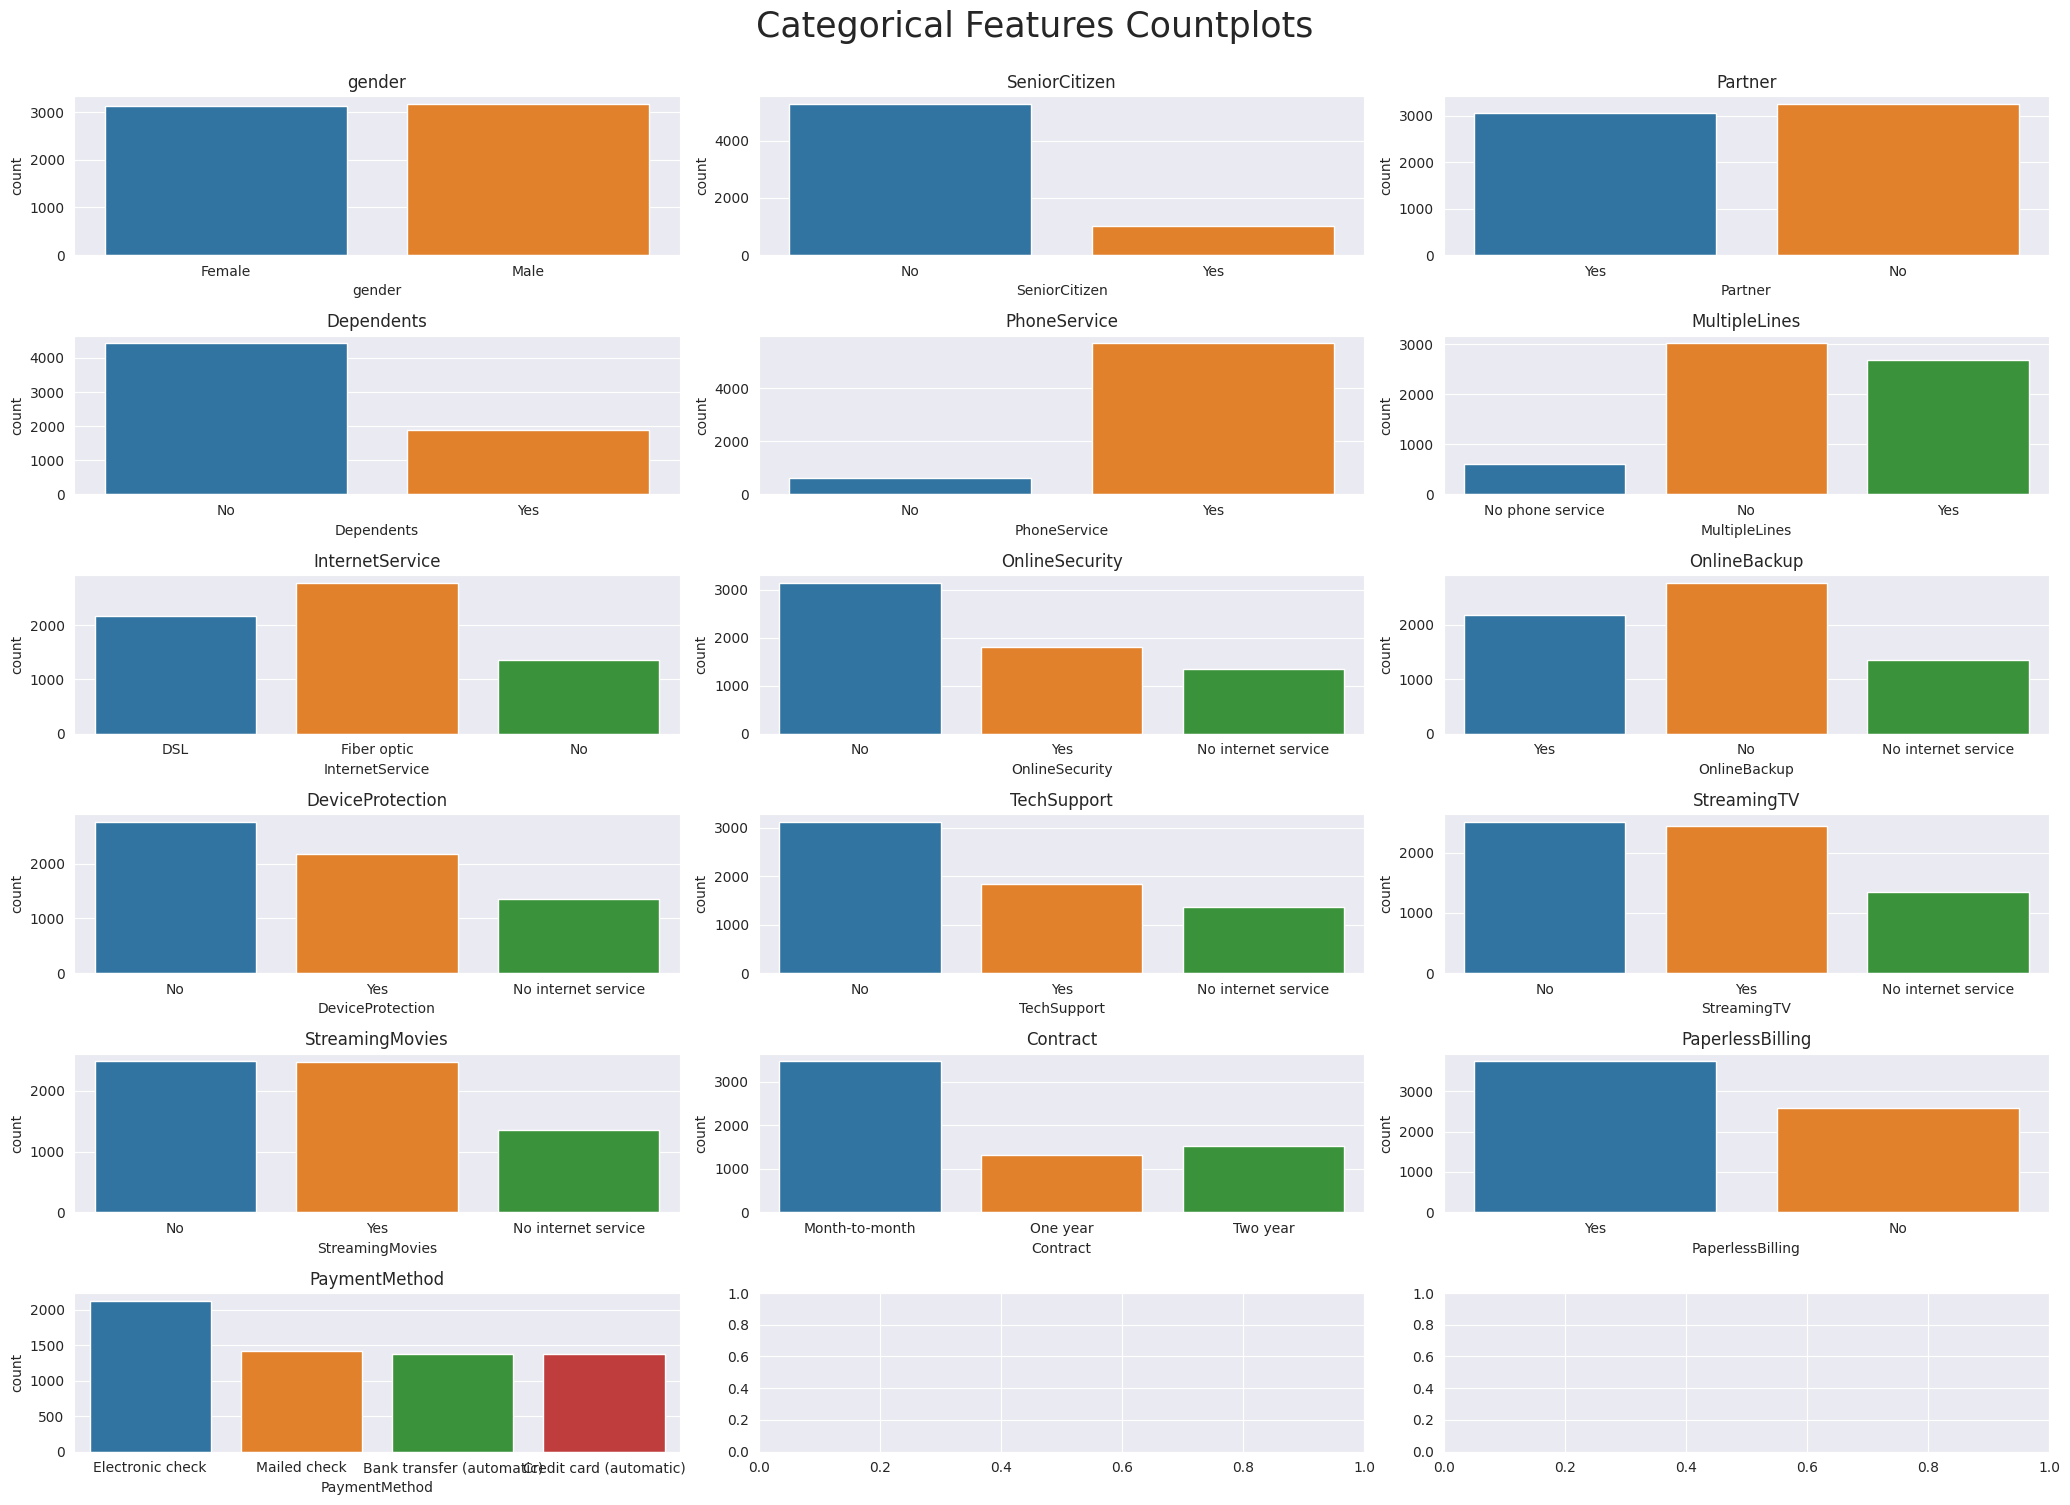

In [42]:
plot_categorical_features(categorical_columns,3,"Categorical Features Countplots")
plt.tight_layout()

### Count plot for the target variable

<Axes: xlabel='Churn', ylabel='count'>

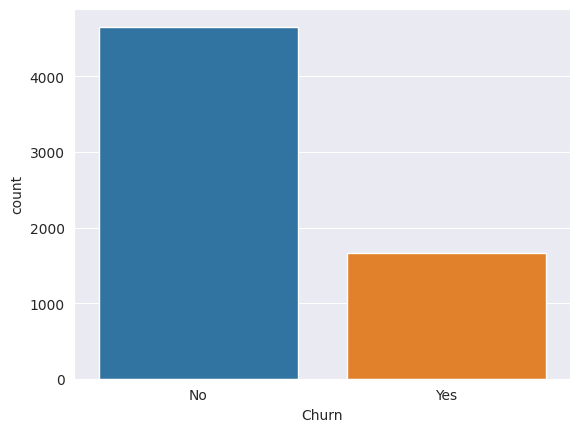

In [13]:
sns.countplot(data=data,x=data["Churn"],orient="h")

##### Observation:
The target variable has class inbalance which requires extra care in the choice of the model and the evaluation metrics.

## Multivariate Analysis

### 1. Numerical Features vs Target.

In [45]:
def numerical_features_scatter_plots(columns,ncols,subtitle):
    if type(len(columns)/ncols) is int:
        nrows = len(columns) // ncols
    else:    
        nrows = len(columns) // ncols + 1
    fig, axes = plt.subplots(nrows = nrows,ncols = ncols,figsize = (20.8,15))
    fig.suptitle(subtitle,y=1, size=25)
    axes = axes.flatten()
    sns.scatterplot(data=data,x=data[columns[0]],y=data[columns[1]],hue="Churn",palette=['#008080','#FF6347'],ax=axes[0])
    axes[0].set_title(f"{columns[0]} vs {columns[1]}")
    sns.scatterplot(data=data,x=data[columns[0]],y=data[columns[2]],hue="Churn",palette=['#008080','#FF6347'],ax=axes[1])
    axes[1].set_title(f"{columns[0]} vs {columns[2]}")
    sns.scatterplot(data=data,x=data[columns[1]],y=data[columns[2]],hue="Churn",palette=['#008080','#FF6347'],ax=axes[2])
    axes[2].set_title(f"{columns[1]} vs {columns[2]}")

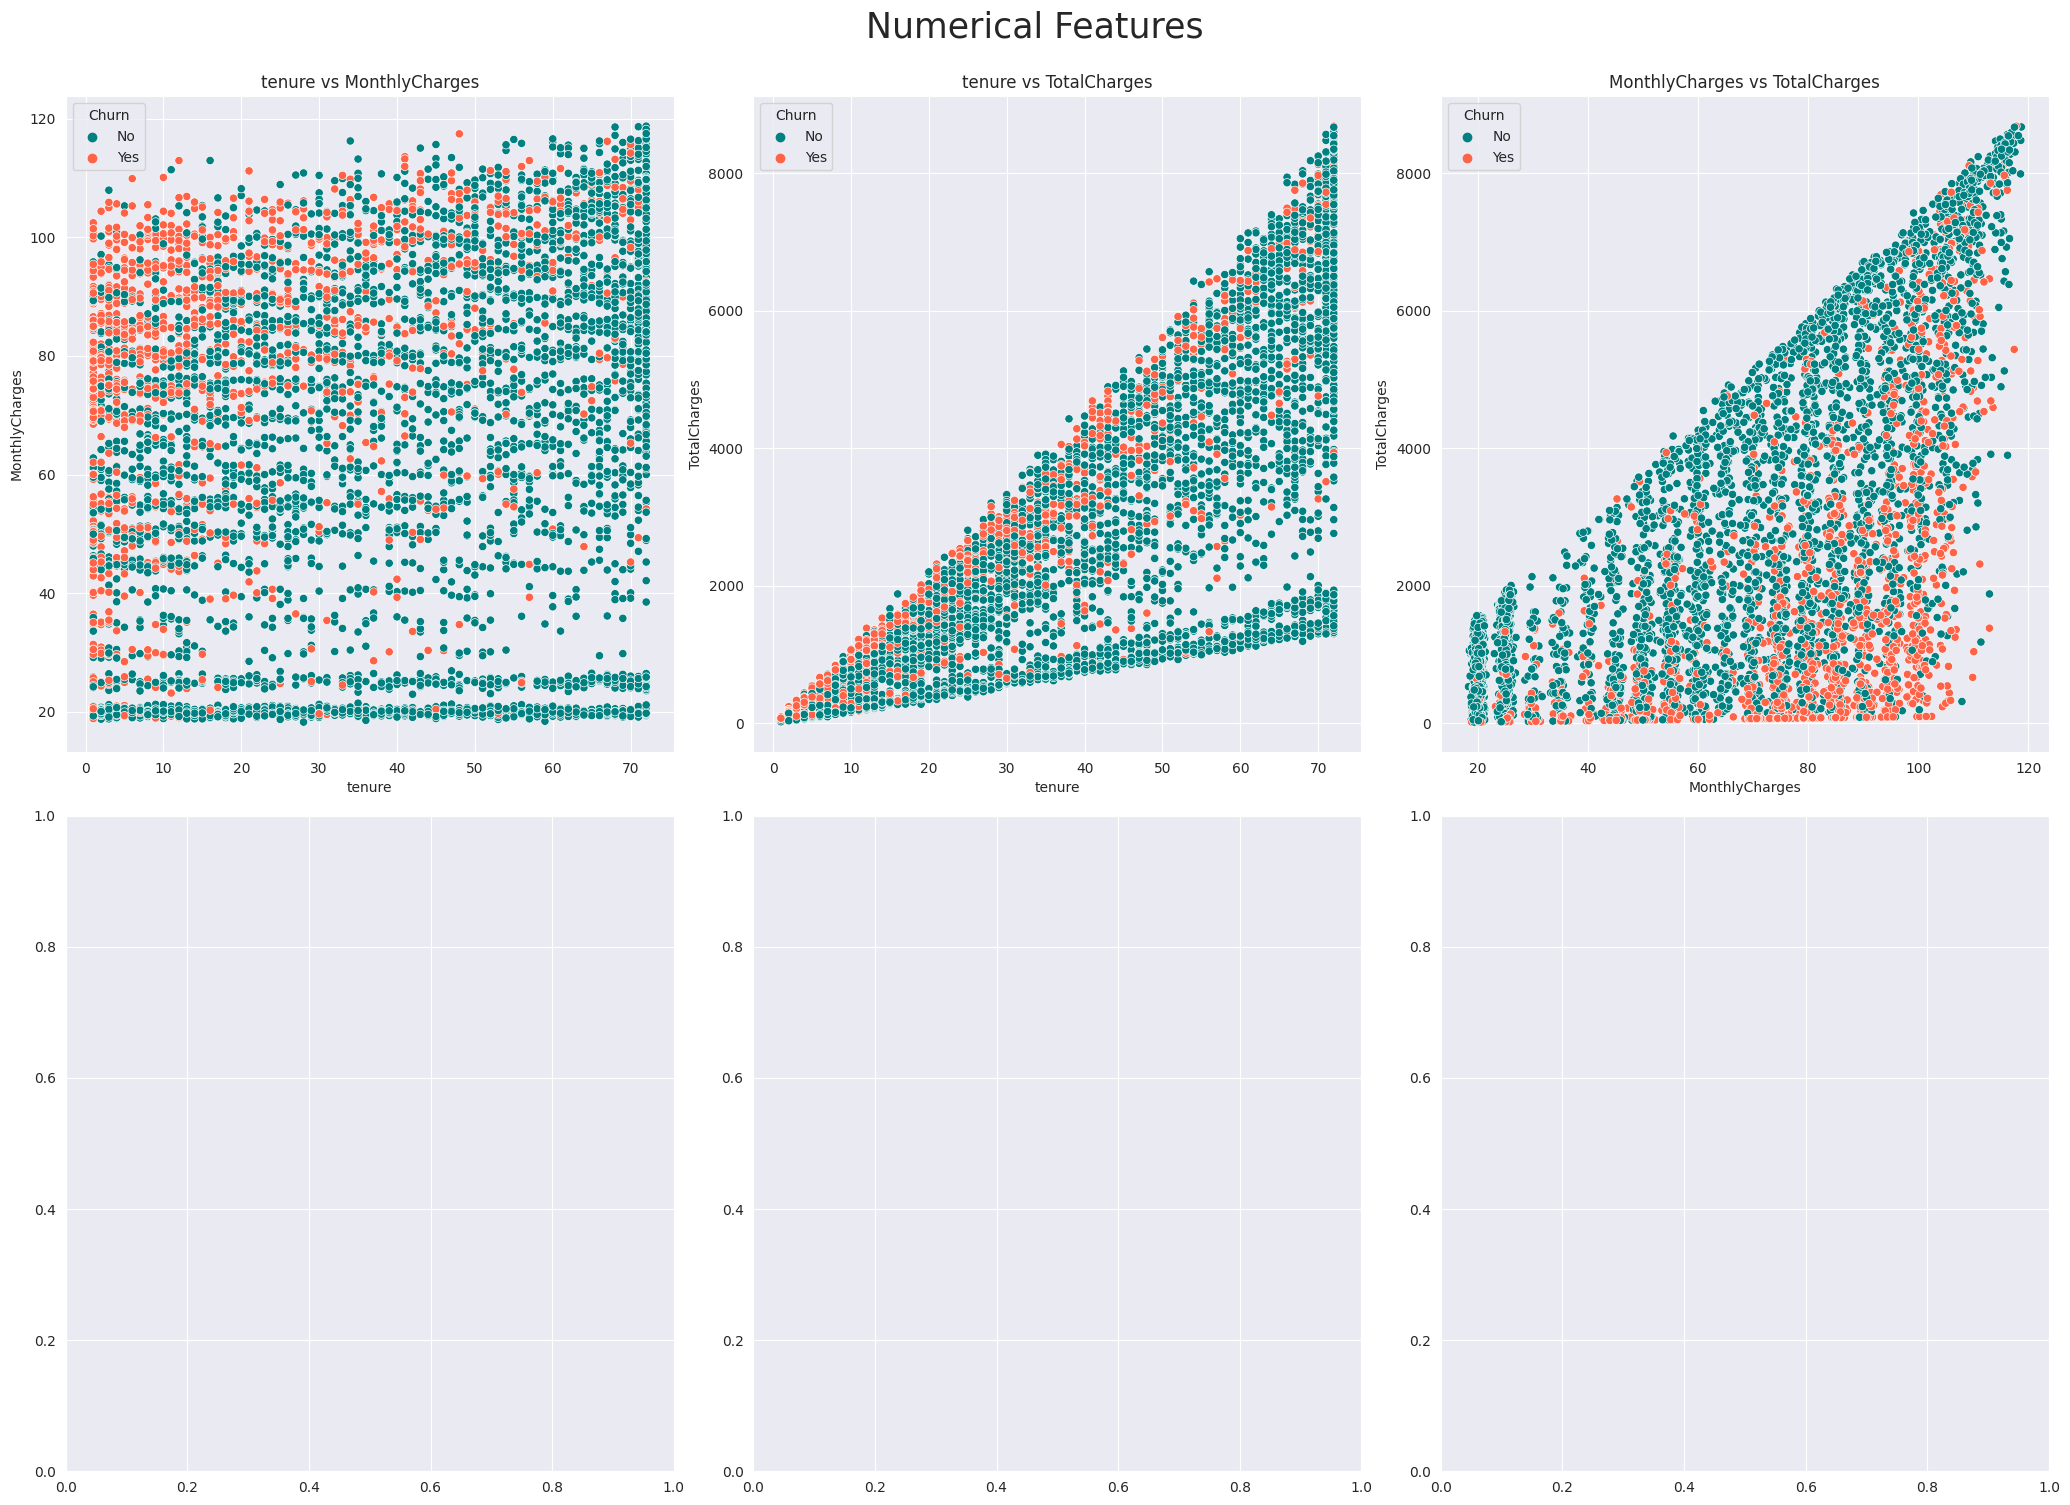

In [46]:
numerical_features_scatter_plots(numerical_columns,3,"Numerical Features")
plt.tight_layout()

### 2. Categorical Features vs Target.

In [49]:
def categorical_vs_churn_countplots(columns,ncols,subtitle):
    if type(len(columns)/ncols) is int:
        nrows = len(columns) // ncols
    else:    
        nrows = len(columns) // ncols + 1
    fig, axes = plt.subplots(nrows = nrows,ncols = ncols,figsize = (20.8,30))
    fig.suptitle(subtitle,y=1, size=25)
    axes = axes.flatten()
    for i, column in enumerate(columns):
        sns.countplot(data=data,x=column,ax=axes[i],hue="Churn")
        axes[i].set_title(column)

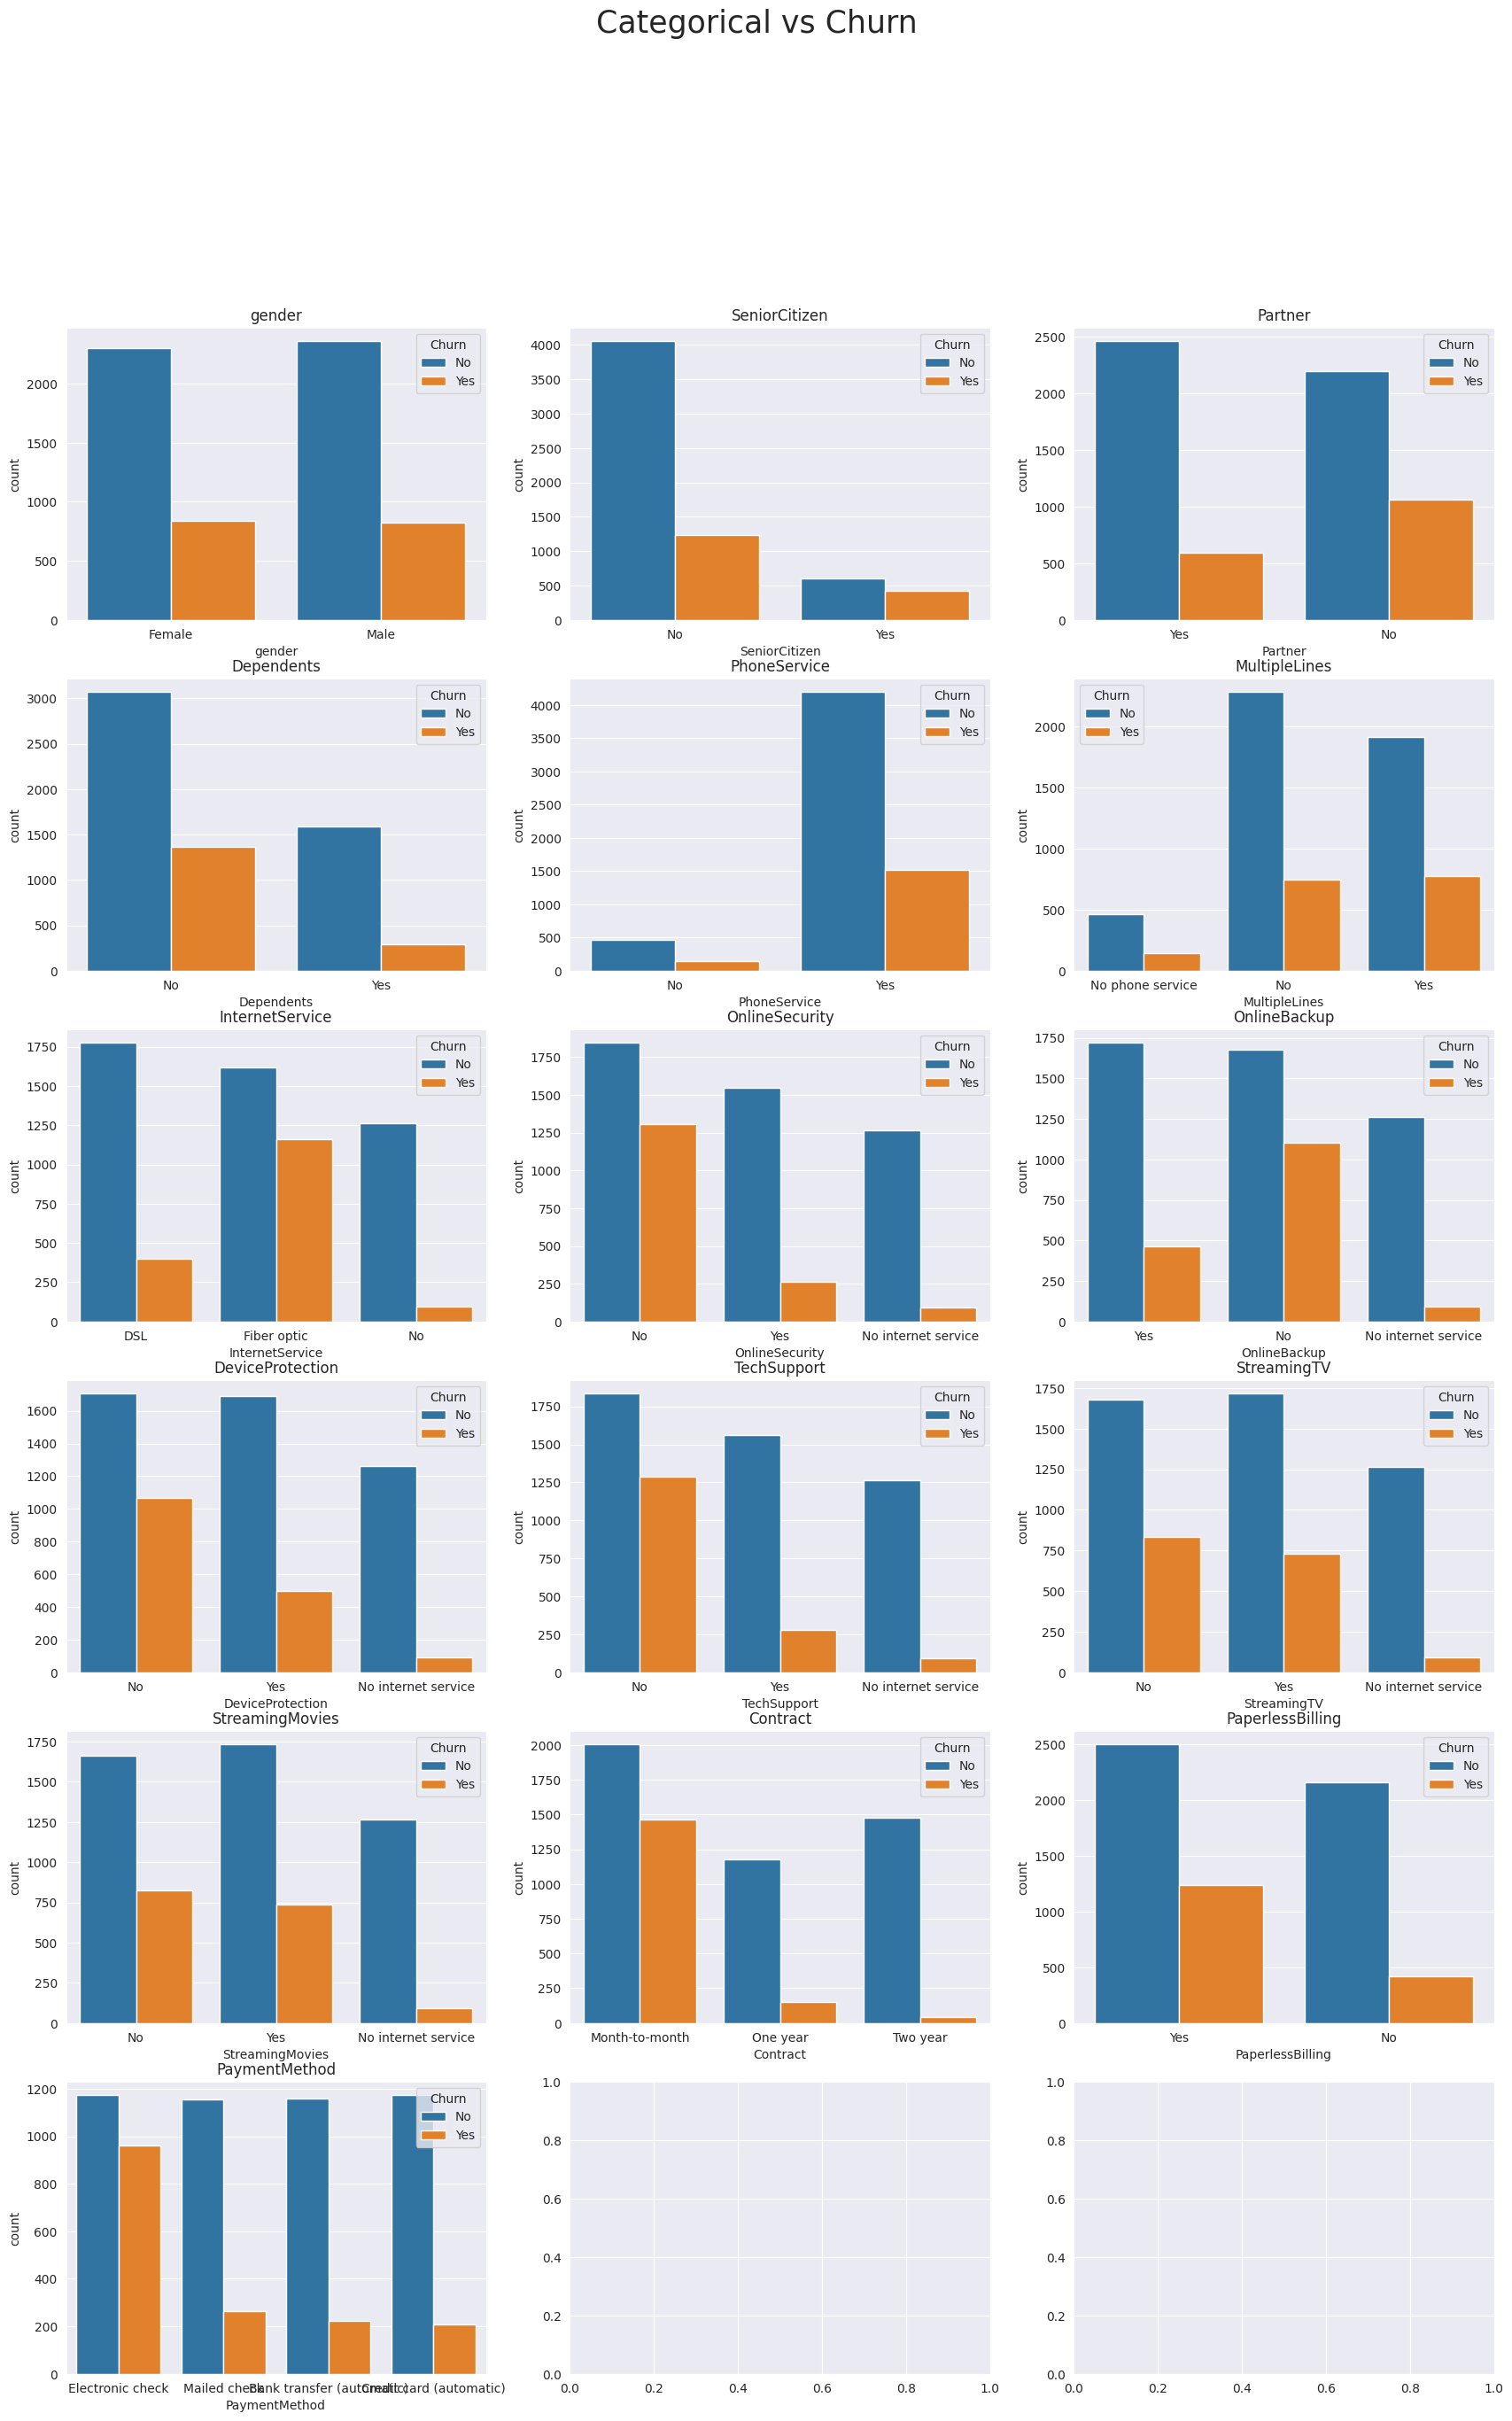

In [50]:
categorical_vs_churn_countplots(categorical_columns,3,"Categorical vs Churn")

### Correlations.

In [8]:
corr = data.corr()

C:\Users\muham\AppData\Local\Temp\ipykernel_7588\1351907255.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


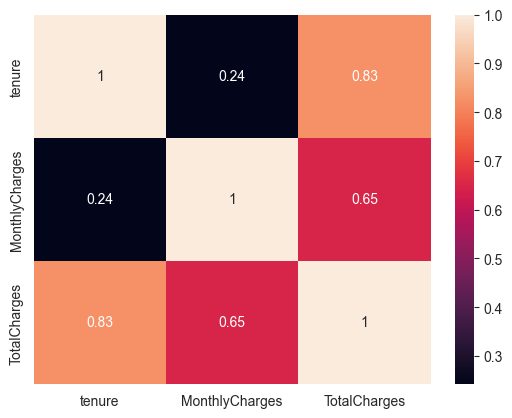

In [10]:
sns.heatmap(corr,annot = True);

# Modeling.
As mentioned previously, the data is inbalanced so we have to try robust models such as random forest or xgboost and select robust evaluation metrics such as recall and f1-score.

In [26]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import (PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   MinMaxScaler,
                                   StandardScaler)
from sklearn.metrics import recall_score,precision_score,roc_curve,roc_auc_score,f1_score,accuracy_score
from sklearn.utils import resample, class_weight

In [27]:
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",OneHotEncoder(),categorical_columns),
        ("Power",PowerTransformer(),["TotalCharges"]),
        ("Standard",StandardScaler(),["MonthlyCharges"]),
        ("MinMax",StandardScaler(),["tenure"]),
    ])

In [97]:
models = {
    "rf" : RandomForestClassifier(random_state=42),
    "xgb" : XGBClassifier(n_estimators=100,max_depth=8,subsample=1,random_state=42),
    "lr" : LogisticRegression(random_state=42),
    "svc" : SVC(random_state=42)
}

In [98]:
pipeline = Pipeline(
    steps=[
        ("preprocessing",transformer),
        ("PCA",PCA(n_components=17)),
        ("model",models["xgb"])
    ])

In [30]:
le = LabelEncoder()
target = le.fit_transform(data["Churn"])

In [48]:
test_data = pd.read_csv(r"input/test.csv")

In [99]:
def cross_validate(pipeline,features,target,k):
    folds_scores = {}
    avg_scores = {}
    skf = StratifiedKFold(n_splits=k,shuffle=False)
    folds = skf.split(features,target)
    for i,(train_indices,val_indices) in enumerate(folds):
        x_train = features.iloc[list(train_indices)]
        y_train = target[list(train_indices)]
        x_val = features.iloc[val_indices]
        y_val = target[val_indices]
        classes_weights = class_weight.compute_sample_weight(
            class_weight='balanced',
            y=y_train)
        pipeline.fit(x_train,y_train,**{"model__sample_weight":classes_weights})
        # pipeline.fit(x_train,y_train)
        preds = pipeline.predict(x_val)
        scores = {}
        scores["accuracy"] = accuracy_score(preds,y_val)
        scores["recall"] = recall_score(preds,y_val)
        scores["precision"] = precision_score(preds,y_val)
        scores["f1"] = f1_score(preds,y_val)
        folds_scores[i] = scores
    for key,v in folds_scores.items():
        for metric,value in v.items():
            if(not metric in avg_scores.keys()):
                avg_scores[metric] = value/k
            else:
                avg_scores[metric] += value/k
    classes_weights = class_weight.compute_sample_weight(
            class_weight='balanced',
            y=target)
    pipeline.fit(features,target,**{"model__sample_weight":classes_weights})
    return avg_scores,folds_scores, pipeline

In [100]:
def evaluate(test_data,pipeline,threshold):
    test_data["TotalCharges"] = test_data["TotalCharges"].map(clean_total_charges).astype(float)
    test_data.dropna(inplace=True)
    label = test_data["Churn"]
    t_label = le.transform(label)
    test_data.drop(labels=["customerID","Churn"],axis=1)
    preds = pipeline.predict_proba(test_data)
    preds = (preds >= threshold)[:,1].astype(int)
    scores = {}
    scores["accuracy"] = accuracy_score(preds,t_label)
    scores["recall"] = recall_score(preds,t_label)
    scores["precision"] = precision_score(preds,t_label)
    scores["f1"] = f1_score(preds,t_label)
    scores["roc_auc"] = roc_auc_score(preds,t_label)
    return scores

In [101]:
avg,scores, pipe = cross_validate(pipeline,data,target,5)

In [102]:
test_score = evaluate(test_data,pipe,0.5)

In [103]:
pd.DataFrame(avg,index=[1])

,accuracy,recall,precision,f1
1,0.77697,0.580839,0.576081,0.578338


In [104]:
test_score

{'accuracy': 0.7517831669044223,
 'recall': 0.533678756476684,
 'precision': 0.5508021390374331,
 'f1': 0.5421052631578948,
 'roc_auc': 0.6841622128840114}

In [ ]:
data.drop(["Churn"],axis=1,inplace=True)

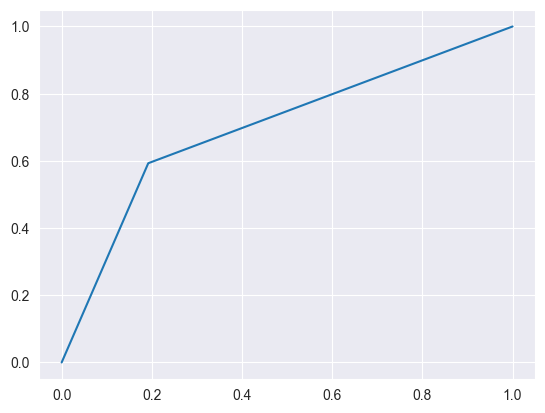

In [341]:
plt.plot(test_score["roc_curve"][0],test_score["roc_curve"][1])

In [8]:
m = {"acc":0.9,"auc":0.7}

In [9]:
from json import dump

In [13]:
with open("metrics.json","w") as f:
    dump(m,f)

In [1]:
from dvclive import Live

In [5]:
with Live(dir="reports") as live:
    live.lo("acc",0.8)

# Testing !!!!!

In [1]:
%cd ..

F:\Courses\python\machine_learning\churn_prediction


In [2]:
from churn_prediction.data import prepare_data
from churn_prediction.modeling import *
from churn_prediction.training import *

In [3]:
data = prepare_data(r"input/train.csv")

In [4]:
numerical_columns = list(data.select_dtypes(exclude=object).columns)
categorical_columns = list(data.select_dtypes(include=object).columns)
categorical_columns.remove("Churn")

In [5]:
rf_config = {"n_estimators":100,"random_state":42}
xgb_config = {"n_estimators":100,"random_state":42}
lr_config = {"random_state":42}
svc_config = {"random_state":42}

In [6]:
models_parameters = {
    "rf_params": rf_config,
    "xgb_params": xgb_config,
    "lr_params": lr_config,
    "svc_params": svc_config
}

In [7]:
models_config = {
    "use_model": "xgb",
    "models_parameters": models_parameters
}

In [8]:
preprocessor_config = {
    "numerical_columns": numerical_columns,
    "categorical_columns": categorical_columns
}

In [9]:
pipeline_config = {
    "models": models_config,
    "preprocessor": preprocessor_config
}

In [10]:
config = {
    "pipeline": pipeline_config
}

In [11]:
pipeline = build_pipeline(config["pipeline"])

In [29]:
data_map = get_features_target(data)

In [14]:
from omegaconf import OmegaConf

In [19]:
config=OmegaConf.load("params.yaml")

In [26]:
train(p,data,5,"pipe.pkl","metrics.json")

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [32]:
list(config["pipeline"]["preprocessor"]["categorical_columns"])

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [39]:
config["pipeline"]["models"]["models_parameters"]["xgb_params"]

{'n_estimators': '100,', 'random_state': 42}

In [31]:
data_map["features"]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30
6334,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40
6335,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
6336,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
